In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Melbourne Housing Snapshot

### About

> House Price Prediction

Anda adalah Data Scientist di sebuah perusahaan real estate di Melbourne. Anda diberikan dataset tentang harga rumah berbagai tipe di Melbourne beserta variabel-variabel terkait rumah seperti jumlah kamar, luas tanah, metode penjualan, dan lainnya.

## Load Dataset

In [3]:
df = pd.read_csv('Dataset/melb_data.csv')

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


<hr/>

**Target Feature**: Price (numerical) 


<hr/>

### Feature description

- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area 

As per instruction for the test, we will use 5000 rows for this task

In [6]:
df = df.iloc[0:5000]

In [7]:
df.shape

(5000, 21)

### Data Overview

In [16]:
describe_columns(df)

,col_name,dtype,null_count,null_%,is_normal_dist,outlier_count,outlier_%,n_unique,unique_sample
0,Suburb,object,0,0.00,cat,NaN,NaN,84,"[Burwood, Caulfield South]"
1,Address,object,0,0.00,cat,NaN,NaN,4956,"[2/872 Drummond St, 20 Emma St]"
2,Rooms,int64,0,0.00,n,252.0,5.04,8,"[3, 2]"
3,Type,object,0,0.00,cat,NaN,NaN,3,"[h, t]"
4,Price,float64,0,0.00,n,230.0,4.60,1400,"[660000.0, 2090000.0]"
5,Method,object,0,0.00,cat,NaN,NaN,5,"[SP, SA]"
6,SellerG,object,0,0.00,cat,NaN,NaN,158,"[J, Domain]"
7,Date,object,0,0.00,cat,NaN,NaN,35,"[24/09/2016, 16/04/2016]"
8,Distance,float64,0,0.00,n,0.0,0.00,68,"[6.3, 8.5]"
9,Postcode,float64,0,0.00,n,0.0,0.00,70,"[3161.0, 3183.0]"


Since each house has unique address, than it's just going to be a unique identifier for each property. However I noticed that the unique count for address is not equal to the dataset length. Let's see

In [17]:
addr_count = df['Address'].value_counts()
duplicate_addr_list = list(addr_count.loc[addr_count.values > 1].index)

# duplicate_addr_list

df[df['Address'].isin(duplicate_addr_list)].sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2641,Flemington,12 John St,2,h,845000.0,S,Nelson,18/03/2017,4.4,3031.0,...,1.0,1.0,0.0,NaN,1910.0,Moonee Valley,-37.7838,144.9273,Northern Metropolitan,3593.0
2967,Gowanbrae,8 Perth Ct,4,h,740000.0,SP,Nelson,27/06/2016,13.6,3043.0,...,2.0,2.0,453.0,213.0,2007.0,Moreland,-37.7016,144.8974,Western Metropolitan,1071.0
4887,Preston,5 Kendall St,3,h,1265000.0,S,hockingstuart/Barry,4/03/2017,8.8,3072.0,...,2.0,1.0,465.0,NaN,NaN,Darebin,-37.7471,144.9877,Northern Metropolitan,14577.0
2761,Glen Iris,6 Chester St,3,h,1600000.0,VB,Fletchers,7/05/2016,9.2,3146.0,...,2.0,1.0,704.0,134.0,1940.0,Boroondara,-37.8520,145.0942,Southern Metropolitan,10412.0
2832,Glen Iris,7 Hope St,3,t,1200000.0,VB,O'Donoghues,24/09/2016,9.2,3146.0,...,2.0,2.0,541.0,NaN,NaN,Stonnington,-37.8628,145.0486,Southern Metropolitan,10412.0
575,Balwyn,112 Belmore Rd,5,h,3020000.0,PI,Jellis,28/05/2016,9.7,3103.0,...,3.0,2.0,715.0,420.0,2009.0,Boroondara,-37.8028,145.0768,Southern Metropolitan,5682.0
4947,Preston,7 Hope St,3,h,930000.0,S,Barry,16/04/2016,8.8,3072.0,...,1.0,0.0,453.0,NaN,NaN,Darebin,-37.7386,144.9828,Northern Metropolitan,14577.0
3518,Kensington,1/16 Mawbey St,2,u,420000.0,SP,Nelson,6/08/2016,4.2,3031.0,...,1.0,1.0,0.0,80.0,2002.0,Melbourne,-37.7899,144.9231,Northern Metropolitan,5263.0
2774,Glen Iris,2 Celia St,6,h,2250000.0,VB,Gary,10/09/2016,9.2,3146.0,...,3.0,2.0,650.0,NaN,1940.0,Boroondara,-37.8534,145.0785,Southern Metropolitan,10412.0
4937,Preston,14 Arthur St,2,h,1065000.0,S,Love,15/10/2016,8.8,3072.0,...,1.0,3.0,507.0,114.0,1910.0,Darebin,-37.7437,144.9995,Northern Metropolitan,14577.0


Even though there are duplicate address, it seems that the property is different. This could be happened for apartment units or stacked housing

Same as address, Longitude and Latitude is also unique per property, than i will not use it for predictors variable

## Data Preprocessing

### 1. Converting Date to month, year, dayofweek

Of course time is important to determine house pricing, as property price tends to increase over time. To process the date, I will convert the Date column

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df['Year_sold'] = df.apply(lambda x: x['Date'].year, axis=1)

In [35]:
df['Month_sold'] = df.apply(lambda x: x['Date'].month, axis=1)

In [36]:
df['Day_sold'] = df.apply(lambda x: x['Date'].dayofweek, axis=1)

**Defining attribute and target column name**

In [37]:
target_cols = 'Price'
attribute_cols = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG',
       'Year_sold', 'Month_sold', 'Day_sold', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount']

X = df[attribute_cols]
y = df[target_cols]

### 1. Missing Data

In [18]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     2162
YearBuilt        1776
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### 1.1. BuildingArea and YearBuilt

BuildingArea will be affecting the house pricing. the number of missing building area is half of the dataset.

This working dataset has been cut for 5000 rows, let's see if we have non-missing data left as a sample from other remaining data. We are going to take another sample, drop the missing data value from the working dataset and add another new sample

In [19]:
#before missing data dropped
df.shape

(5000, 21)

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(2735, 21)

In [22]:
# so we are left about this rows
5000 - 2735

2265

In [23]:
df_full = pd.read_csv('Dataset/melb_data.csv')

In [24]:
df_remaining = df_full.iloc[5000:]

In [25]:
df_new_sample = df_remaining[(df_remaining['BuildingArea'].notna()) & (df_remaining['YearBuilt'].notna()) & (df_remaining['CouncilArea'].notna())].sample(2265)

In [26]:
# looks good
df_new_sample.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [27]:
df = df.append(df_new_sample)

In [28]:
df.reset_index()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
1,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
2,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
3,6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
4,7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5568,South Melbourne,372 Dorcas St,3,h,2300000.0,S,RT,24/09/2016,2.1,...,2.0,2.0,0.0,260.0,1877.0,Port Phillip,-37.8352,144.9520,Southern Metropolitan,5943.0
4996,5776,St Kilda,48 Greeves St,4,h,2000000.0,VB,Gary,4/03/2017,6.1,...,2.0,3.0,420.0,160.0,1910.0,Port Phillip,-37.8667,144.9832,Southern Metropolitan,13240.0
4997,7120,Murrumbeena,3 Churchill Cl,3,t,1160000.0,S,hockingstuart,4/06/2016,12.1,...,2.0,2.0,302.0,172.0,2000.0,Glen Eira,-37.9043,145.0622,Southern Metropolitan,4442.0
4998,5866,St Kilda,35 Pakington St,3,h,1678000.0,S,McGrath,27/06/2016,6.1,...,2.0,2.0,361.0,171.0,2016.0,Port Phillip,-37.8663,144.9882,Southern Metropolitan,13240.0


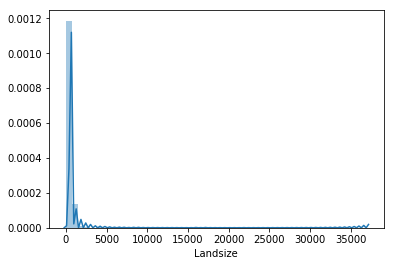

In [29]:
sns.distplot(df['Landsize'])

I saw many Landsize data is 0. this is anomaly. Usually in the urban area, houses are within similar landsize per district area (CouncilArea)

In [30]:
med_landsize = df.groupby('CouncilArea')['Landsize'].median()

In [31]:
df['Landsize'] = df.apply(lambda x: med_landsize[x['CouncilArea']] if x['Landsize'] == 0 else x['Landsize'], axis=1)

## Feature Analysis and EDA Observation

In [32]:
describe_columns(df)

,col_name,dtype,null_count,null_%,is_normal_dist,outlier_count,outlier_%,n_unique,unique_sample
0,Suburb,object,0,0.0,cat,NaN,NaN,266,"[Blackburn South, Edithvale]"
1,Address,object,0,0.0,cat,NaN,NaN,4952,"[10 McCully St, 101 Holmes Rd]"
2,Rooms,int64,0,0.0,n,3.0,0.06,8,"[7, 8]"
3,Type,object,0,0.0,cat,NaN,NaN,3,"[t, u]"
4,Price,float64,0,0.0,n,232.0,4.64,1432,"[1662000.0, 947000.0]"
5,Method,object,0,0.0,cat,NaN,NaN,5,"[PI, SP]"
6,SellerG,object,0,0.0,cat,NaN,NaN,186,"[Nicholson, Ross]"
7,Date,object,0,0.0,cat,NaN,NaN,51,"[25/02/2017, 20/05/2017]"
8,Distance,float64,0,0.0,n,145.0,2.90,184,"[9.5, 3.3]"
9,Postcode,float64,0,0.0,n,53.0,1.06,175,"[3155.0, 3171.0]"


### 1. Target Class (Price)

**Distribution and outlier**

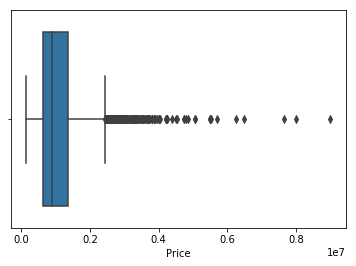

In [38]:
sns.boxplot(df['Price'])

There are many outliers in target variables. let's analyze

In [39]:
x = df['Price']
iqr = x.quantile(.75) - x.quantile(.25)
low = x.quantile(.25) - (1.5*iqr)
high = x.quantile(.75) + (1.5*iqr)

outlier_price = df[df['Price'] >= high]

In [40]:
outlier_price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year_sold,Month_sold,Day_sold
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,2017-04-03,3.3,3206.0,...,198.0,1890.0,Port Phillip,-37.8481,144.9499,Southern Metropolitan,3280.0,2017,4,0
92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,2016-10-12,3.3,3206.0,...,181.0,1880.0,Port Phillip,-37.8415,144.9585,Southern Metropolitan,3280.0,2016,10,2
102,Albert Park,97 Page St,3,h,3010000.0,S,Greg,2017-03-18,3.3,3206.0,...,146.0,1890.0,Port Phillip,-37.8473,144.9551,Southern Metropolitan,3280.0,2017,3,5
103,Albert Park,55 Withers St,4,h,2800000.0,VB,Cayzer,2016-06-18,3.3,3206.0,...,254.0,1910.0,Port Phillip,-37.8467,144.9475,Southern Metropolitan,3280.0,2016,6,5
108,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,2017-02-25,3.3,3206.0,...,207.0,1910.0,Port Phillip,-37.8477,144.9558,Southern Metropolitan,3280.0,2017,2,5


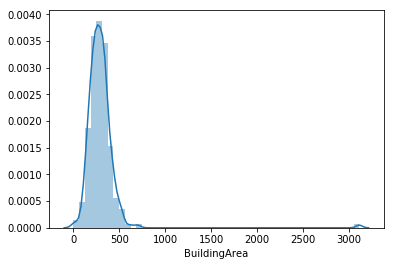

In [41]:
sns.distplot(outlier_price['BuildingArea'])

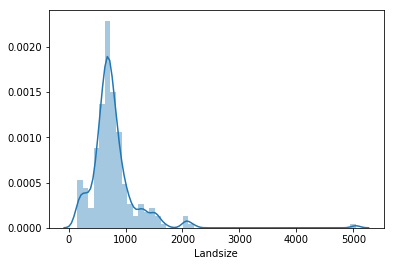

In [42]:
sns.distplot(outlier_price['Landsize'])

In [43]:
outlier_price['Landsize'].mean()

775.2370689655172

Mostly large houses with large landsize are filling this outlier category

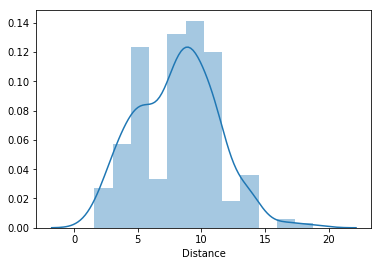

In [44]:
sns.distplot(outlier_price['Distance'])

In [45]:
df['YearBuilt'] = df['YearBuilt'].astype(int)

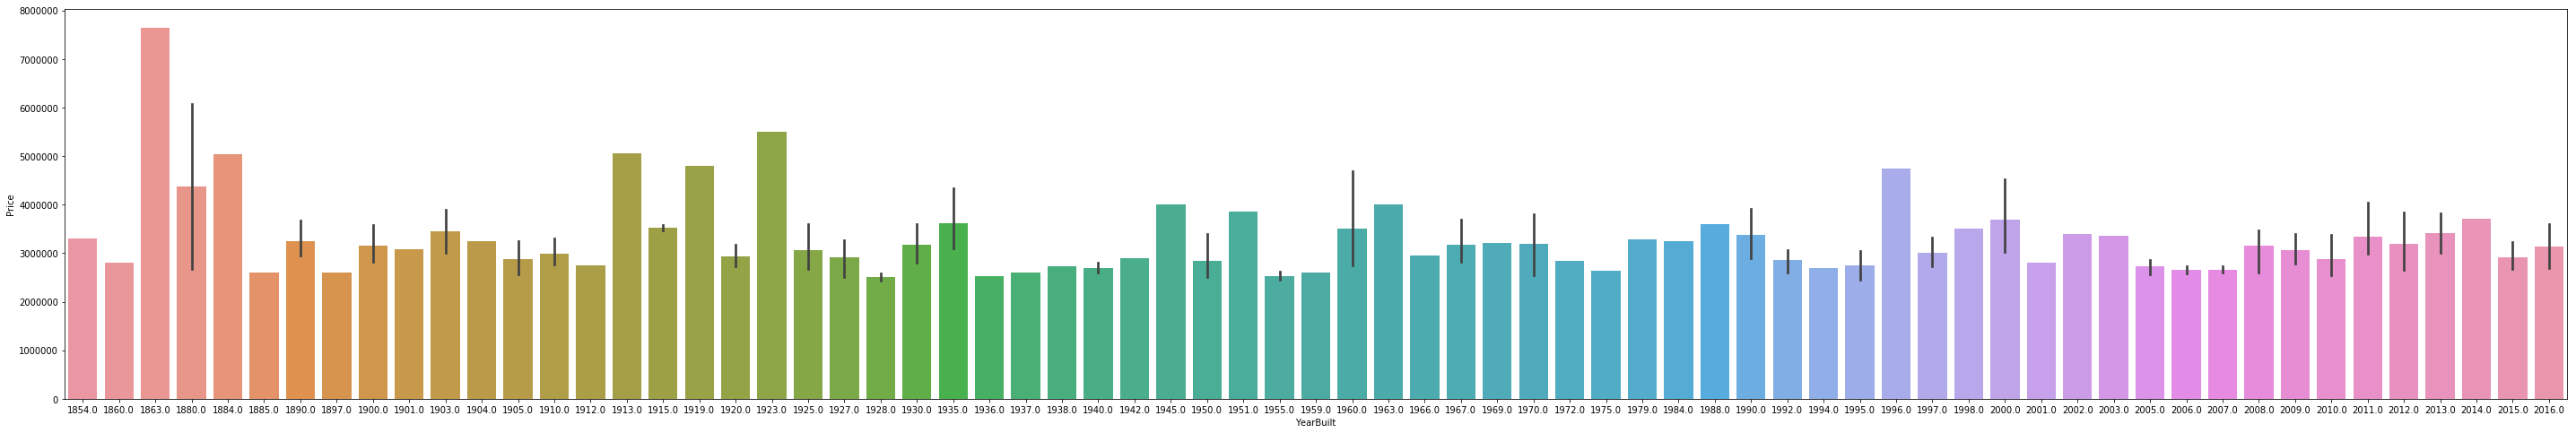

In [46]:
plt.figure(figsize=(50,8))
sns.barplot(x='YearBuilt', y='Price', data=outlier_price)

Some old houses has significant high price compared to others. Looks like 1971 built houses are the most expensive

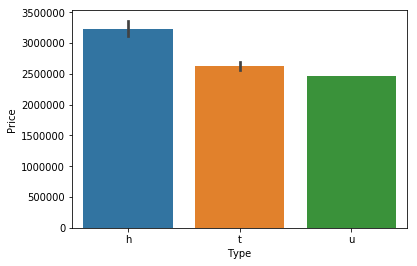

In [47]:
sns.barplot(x='Type', y='Price', data=outlier_price)

Most expensive properties are house and townhouses

### 2. Categorical Variables and their relation with target variable

#### Rooms against Price

In [131]:
rvp = df.groupby('Rooms')[['Price','Rooms']].agg('median')
rvp

,Price,Rooms
Rooms,,
1,370250.0,1
2,655000.0,2
3,950000.0,3
4,1352000.0,4
5,1815000.0,5
6,1850000.0,6
7,1650000.0,7
8,881000.0,8


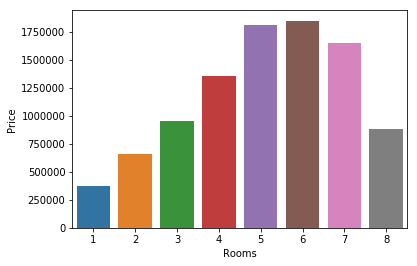

In [132]:
sns.barplot(x='Rooms', y='Price', data = rvp)

Apparently in Melbourne, it is quite common for a house to have that many rooms :)

The more room number, the price is increasing (looks like linearly)

#### Bedroom2 vs Price 

In [133]:
rvp = df.groupby('Bedroom2')[['Price','Bedroom2']].agg('median')
rvp

,Price,Bedroom2
Bedroom2,,
0.0,1195000.0,0.0
1.0,375000.0,1.0
2.0,665750.0,2.0
3.0,966000.0,3.0
4.0,1367000.0,4.0
5.0,1795000.0,5.0
6.0,1856000.0,6.0
7.0,1602500.0,7.0
8.0,770000.0,8.0


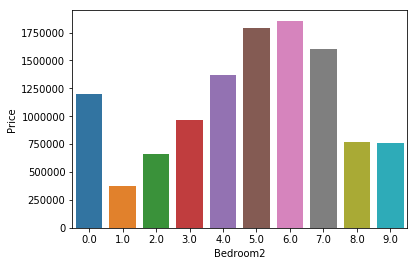

In [134]:
sns.barplot(x='Bedroom2', y='Price', data = rvp)

Number of Bedroom also affecting the price. However we could see there lots of 0 bedrooms

In [136]:
df[df['Bedroom2'] == 0]['Type'].value_counts()

h    3
t    1
Name: Type, dtype: int64

That's more like data anomaly

#### Bathroom vs Price

In [137]:
rvp = df.groupby('Bathroom')[['Price','Bathroom']].agg('median')
rvp

,Price,Bathroom
Bathroom,,
1.0,713000.0,1.0
2.0,1100000.0,2.0
3.0,1663000.0,3.0
4.0,2776000.0,4.0
5.0,2558000.0,5.0
6.0,1260000.0,6.0
7.0,2950000.0,7.0
8.0,760000.0,8.0


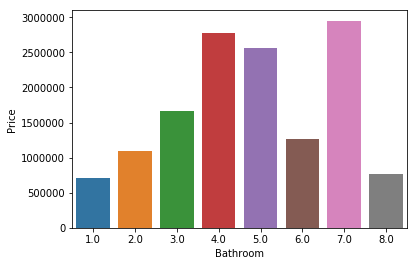

In [138]:
sns.barplot(x='Bathroom', y='Price', data = rvp)

Number of bathroom seems to affect Price as well. However I could see that 6 and 8 bathrooms houses are not selling good

#### Property Type vs price

In [141]:
rvp = df.groupby('Type')[['Price','Type']].agg('median')
rvp

,Price
Type,
h,1127000.0
t,810000.0
u,545750.0


Houses are still most expensive among other. Townhouses comes in seconds. Apartment units are much smaller, thus less expensive

#### Which month is the best for selling houses?

In [161]:
rvp = df.groupby('Month_sold')[['Price','Month_sold']].agg('median')
rvp

,Price,Month_sold
Month_sold,,
1,666750.0,1
2,1025000.0,2
3,946000.0,3
4,882000.0,4
5,887500.0,5
6,860000.0,6
7,814000.0,7
8,846000.0,8
9,967500.0,9


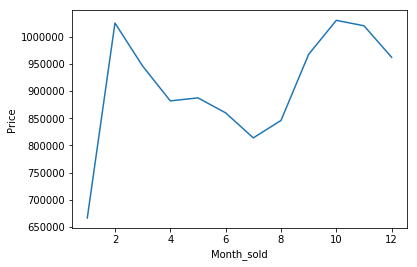

In [159]:
sns.lineplot(x='Month_sold', y='Price', data = rvp)

Expensive property are best selling on The end of the year till February.

### 3. Numerical Variables and their relation with target variable

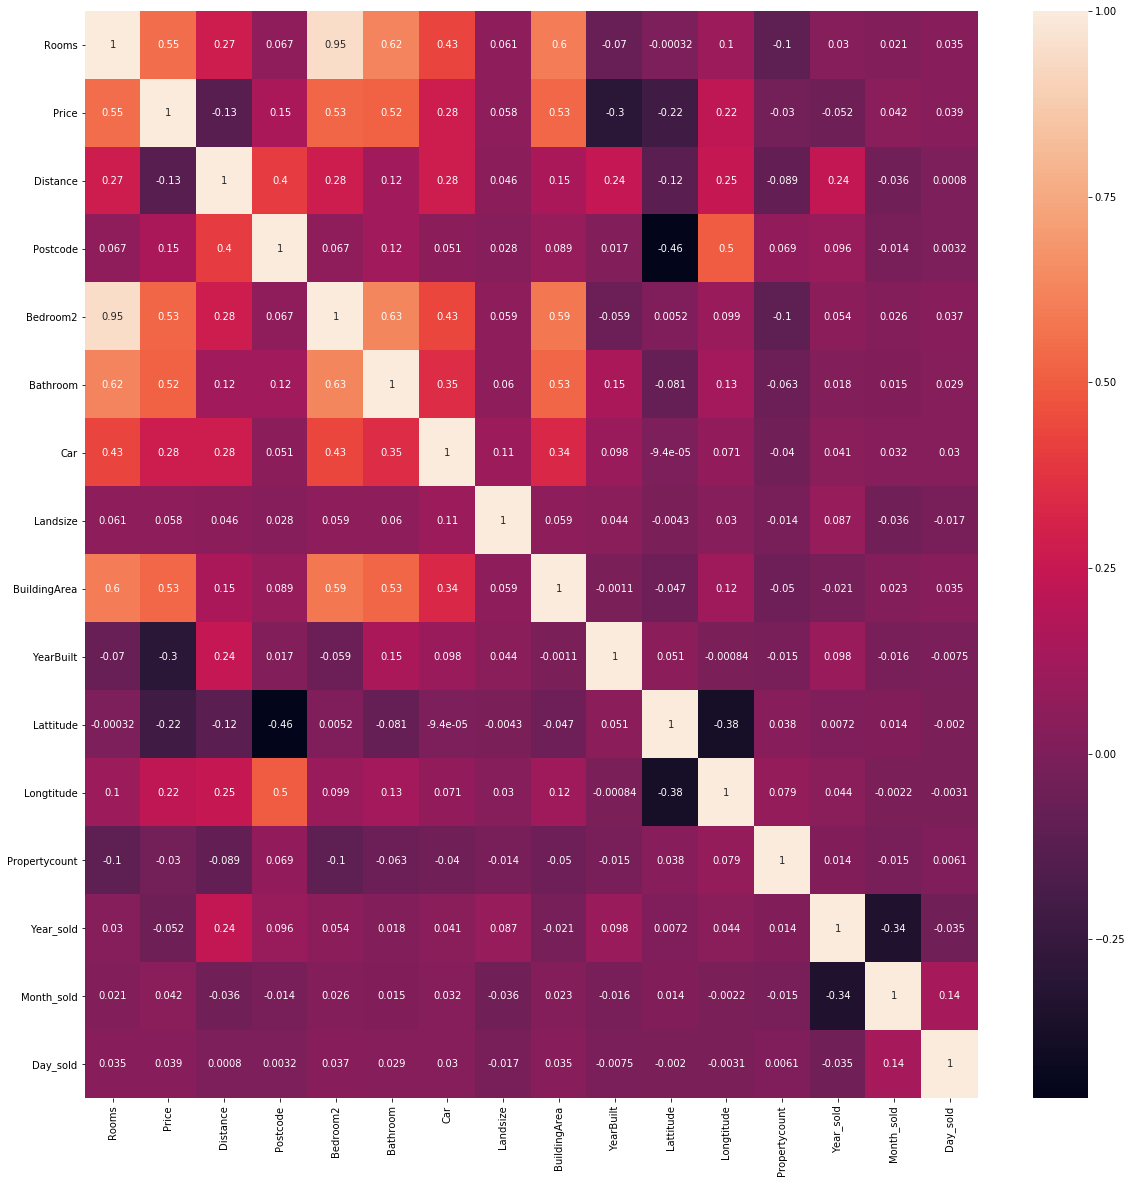

In [164]:
#get correlations of each features in dataset
corrmat = df[df.describe().columns].corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

Some of the significant features are:

- Rooms
- Bedroom2
- Bathroom
- BuildingArea
- Car
- YearBuilt

These are all make sense as we often see it on listing ads. We need to make sure that these variables are included as predictor variables

### Encode Categorical Value

In [49]:
df_base = get_dummies(df, columns=['Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'Suburb'])

In [50]:
X_base = df_base.drop(['Address', 'Longtitude', 'Lattitude', 'Price', 'Postcode'], axis=1)
y_base = df_base['Price']

### Preparing Dataset for model

I will make three scenario for the dataset:

1. untouched dataset
2. scaled dataset (Robust scaler as the distribution is non-gaussian, and we would like to consider outlier)
3. outlier removed with standardscaler

In [51]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Year_sold', 'Month_sold',
       'Day_sold'],
      dtype='object')

In [52]:
# scaled dataset

from sklearn.preprocessing import RobustScaler

df_rscaled = df_base.copy()

for col in ['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']:
    df_rscaled[col] = RobustScaler().fit_transform(df_rscaled[[col]])

In [53]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Year_sold', 'Month_sold',
       'Day_sold'],
      dtype='object')

In [54]:
df_outlier_ref = create_outlier_reference_df(df_base, columns=['Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea','Propertycount', 'Rooms' ]).reset_index()

In [55]:
# outlier removed with standard scaler

from sklearn.preprocessing import StandardScaler

nooutlier_compound_index = df_outlier_ref[df_outlier_ref['outlier_compound'] == 0].index

df_nooutlier_sscaled = df_base.iloc[nooutlier_compound_index].copy()

for col in ['Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea','Propertycount', 'Rooms' ]:
    df_nooutlier_sscaled[col] = StandardScaler().fit_transform(df_nooutlier_sscaled[[col]])


In [56]:
training_set = {
    'original': df_base,
    'rscaled': df_rscaled,
    'noout_sscaled': df_nooutlier_sscaled
}

## Model Fitting

Regression Model (algorithm) that I would like to try are:

Linear Model

- LinearRegression
- Lasso
- Ridge
- ElasticNet

Tree-Based Model

- DecisionTreeRegressor
- RandomForestRegressor

### 1. Objective

I would like to aim for having model prediction that has low bias as possible but still maintaing low variance:

Three metrics that i'll be focused will be:
- RMSE
- MAE


I will try several method listed above, for each model, we will try several option:

- cross validation (for linear model)
- Hyperparameter tuning with cross validation (for tree based model)


## Linear Model

In [57]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)

In [69]:
eval_matrix_wholedata = []

In [70]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### 1. Fit all the data in

{'name': 'original_MLR', 'MAE': 22478878672.701412, '%MAPE': 3045470.5566190807, 'RMSE': 186662917582.87234, '%RMSPE': 26091478.383823715, 'r2': -75597688949.14, 'cv_score_rmse': -178082169209.3838}
{'name': 'original_Ridge', 'MAE': 230218.81219856127, '%MAPE': 24.91301763935385, 'RMSE': 344692.28009588586, '%RMSPE': 36.45025270484851, 'r2': 0.74, 'cv_score_rmse': -390217.0679653621}
{'name': 'original_Lasso', 'MAE': 233906.39656711323, '%MAPE': 25.585955660480735, 'RMSE': 348932.81993980374, '%RMSPE': 37.94468136301892, 'r2': 0.74, 'cv_score_rmse': -400047.3932201511}
{'name': 'original_ElasticNet', 'MAE': 268136.39442579553, '%MAPE': 26.900618661387337, 'RMSE': 413063.6763703035, '%RMSPE': 35.440330654714884, 'r2': 0.63, 'cv_score_rmse': -453641.73490413965}
{'name': 'original_SVR', 'MAE': 468476.6292917664, '%MAPE': 46.22305662546385, 'RMSE': 706496.2805723975, '%RMSPE': 63.150598977997966, 'r2': -0.08, 'cv_score_rmse': -720058.8469575549}
{'name': 'rscaled_MLR', 'MAE': 139329753644

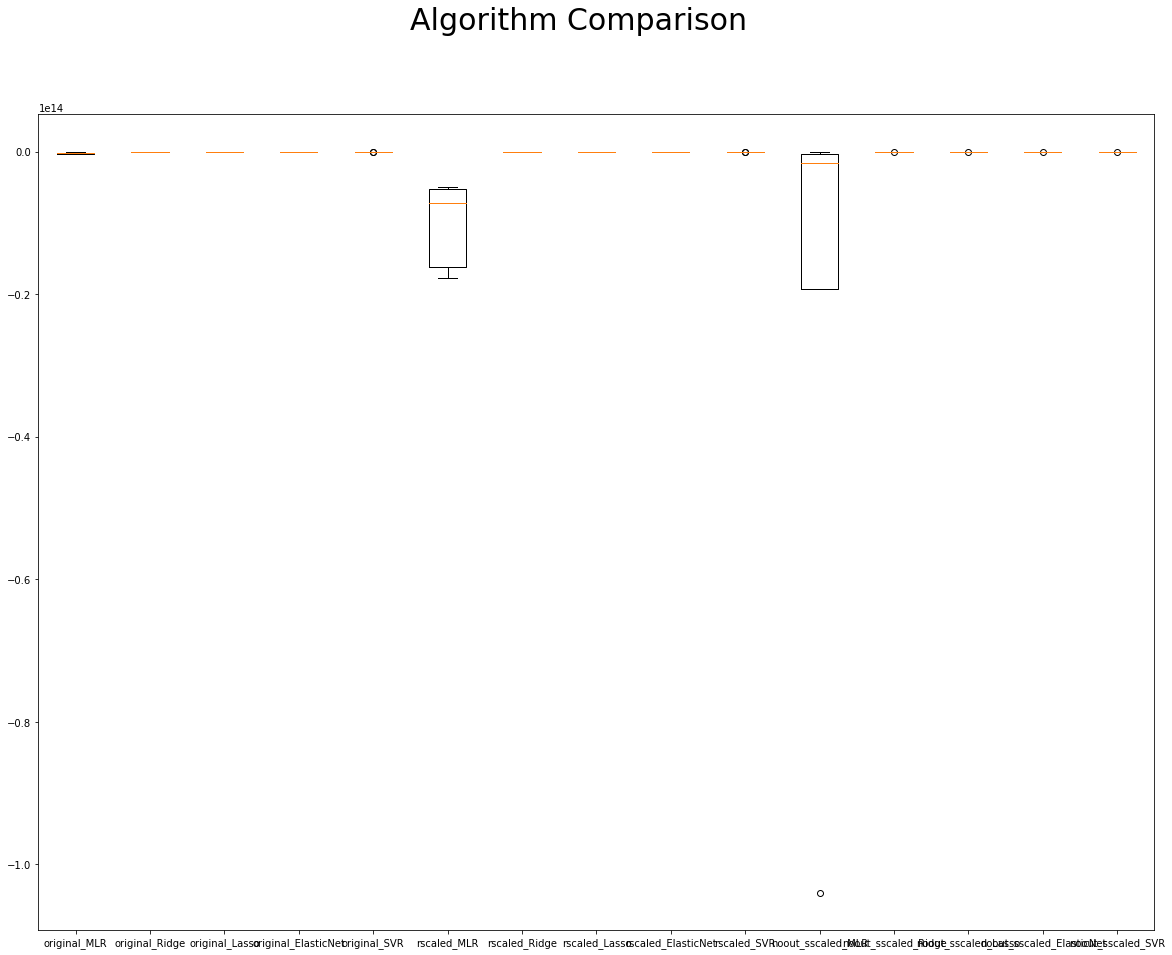

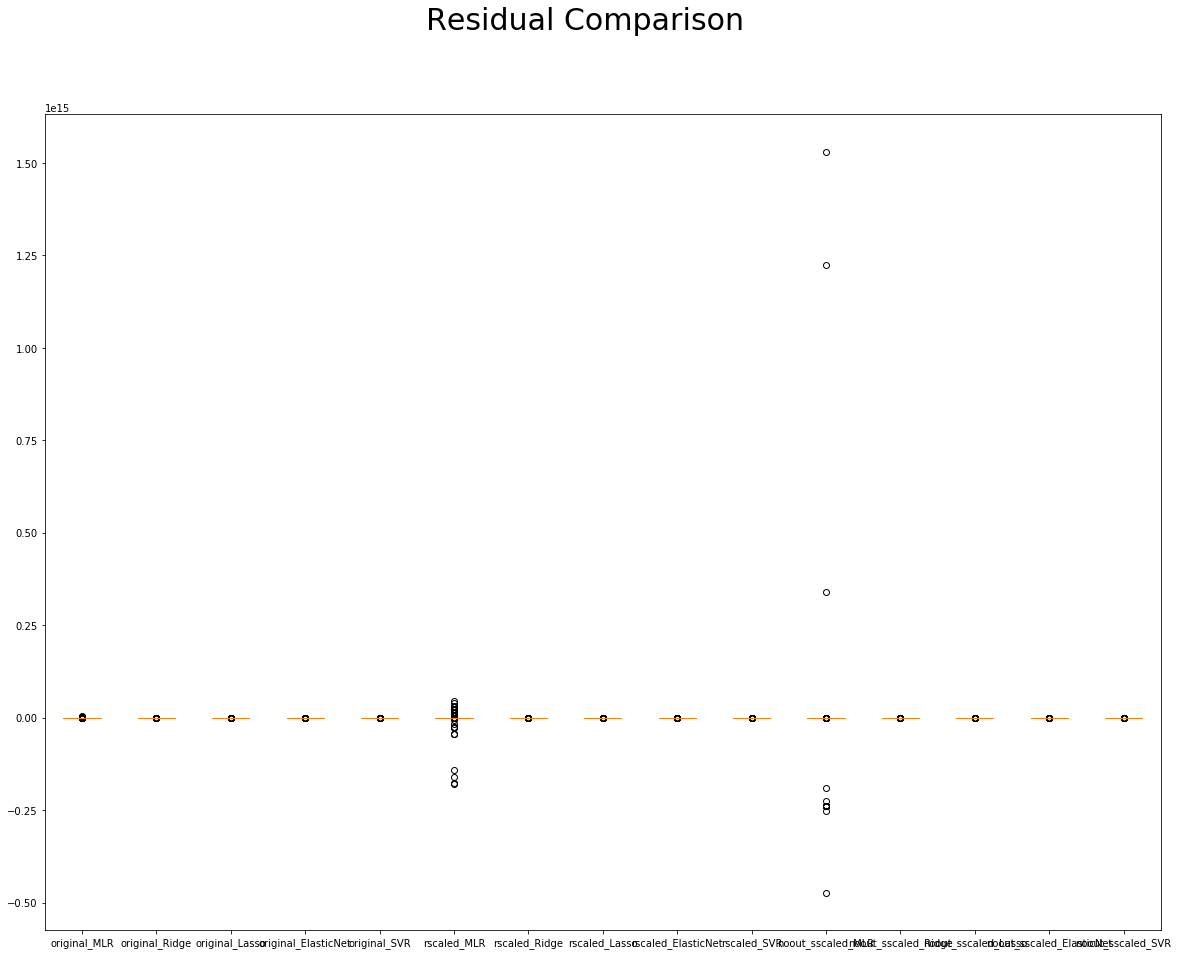

In [71]:
# prepare models
models = []

models.append(('MLR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('SVR', SVR()))

results = []
names = []
y_residuals = []
scoring = 'neg_root_mean_squared_error'

# loop through the training set
for dfname in training_set.keys():
    
    X = training_set[dfname].drop(['Address', 'Longtitude', 'Lattitude', 'Price', 'Postcode', 'Date'], axis=1).values    
    y = training_set[dfname]['Price'].values
    
    # ----------------------------
    # Train and Test each model     
    # ----------------------------
    
    # split train data     
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        eval_ = {
            'name': dfname+'_'+name,
            'MAE': metrics.mean_absolute_error(y_test, y_pred),
            '%MAPE': mean_absolute_percentage_error(y_test, y_pred),
            'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
            '%RMSPE': (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100,
            'r2': round(metrics.r2_score(y_test, y_pred), 2)
        }
        
        # visualize residual          
        residual_df = {
            'y_pred': y_pred,
            'y_act': y_test
        }
        residual_df = pd.DataFrame(residual_df)
        residual_df['residual'] = residual_df['y_pred'] - residual_df['y_act']
        
        y_residuals.append(residual_df['residual'].values)
        
        # -----------------
        # cross validation         
        # -----------------
        
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(dfname+'_'+name)
        
        eval_['cv_score_rmse'] = cv_results.mean()

        eval_matrix_wholedata.append(eval_)
        
        print(eval_)
        
        
        
# boxplot algorithm comparison (based on rmse)
fig = plt.figure(figsize=(20,15))
fig.suptitle('Algorithm Comparison', fontsize=30)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# boxplot algorithm comparison (based on rmse)
fig = plt.figure(figsize=(20,15))
fig.suptitle('Residual Comparison', fontsize=30)
ax = fig.add_subplot(111)
plt.boxplot(y_residuals)
ax.set_xticklabels(names)
plt.show()



### 2. Try with reduced number of independent variables

{'name': 'original_MLR_reduced', 'MAE': 317980.17140134145, '%MAPE': 32.46526484259757, 'RMSE': 468269.1667632795, '%RMSPE': 43.457446340993, 'r2': 0.52, 'cv_score_rmse': -497559.5993563781}
{'name': 'original_Ridge_reduced', 'MAE': 317963.58262541733, '%MAPE': 32.46368928406713, 'RMSE': 468248.8010247158, '%RMSPE': 43.454031289065945, 'r2': 0.52, 'cv_score_rmse': -497562.07976498746}
{'name': 'original_Lasso_reduced', 'MAE': 317979.8263608416, '%MAPE': 32.46522689776286, 'RMSE': 468268.64623214497, '%RMSPE': 43.45735350569233, 'r2': 0.52, 'cv_score_rmse': -497559.8224441361}
{'name': 'original_ElasticNet_reduced', 'MAE': 317406.78903636837, '%MAPE': 32.741396263942555, 'RMSE': 470975.44236267265, '%RMSPE': 43.55206489491854, 'r2': 0.52, 'cv_score_rmse': -511293.8513427926}
{'name': 'original_SVR_reduced', 'MAE': 468477.88937519345, '%MAPE': 46.22392742159205, 'RMSE': 706493.1267949522, '%RMSPE': 63.15212293233107, 'r2': -0.08, 'cv_score_rmse': -720059.9045086994}
{'name': 'rscaled_MLR

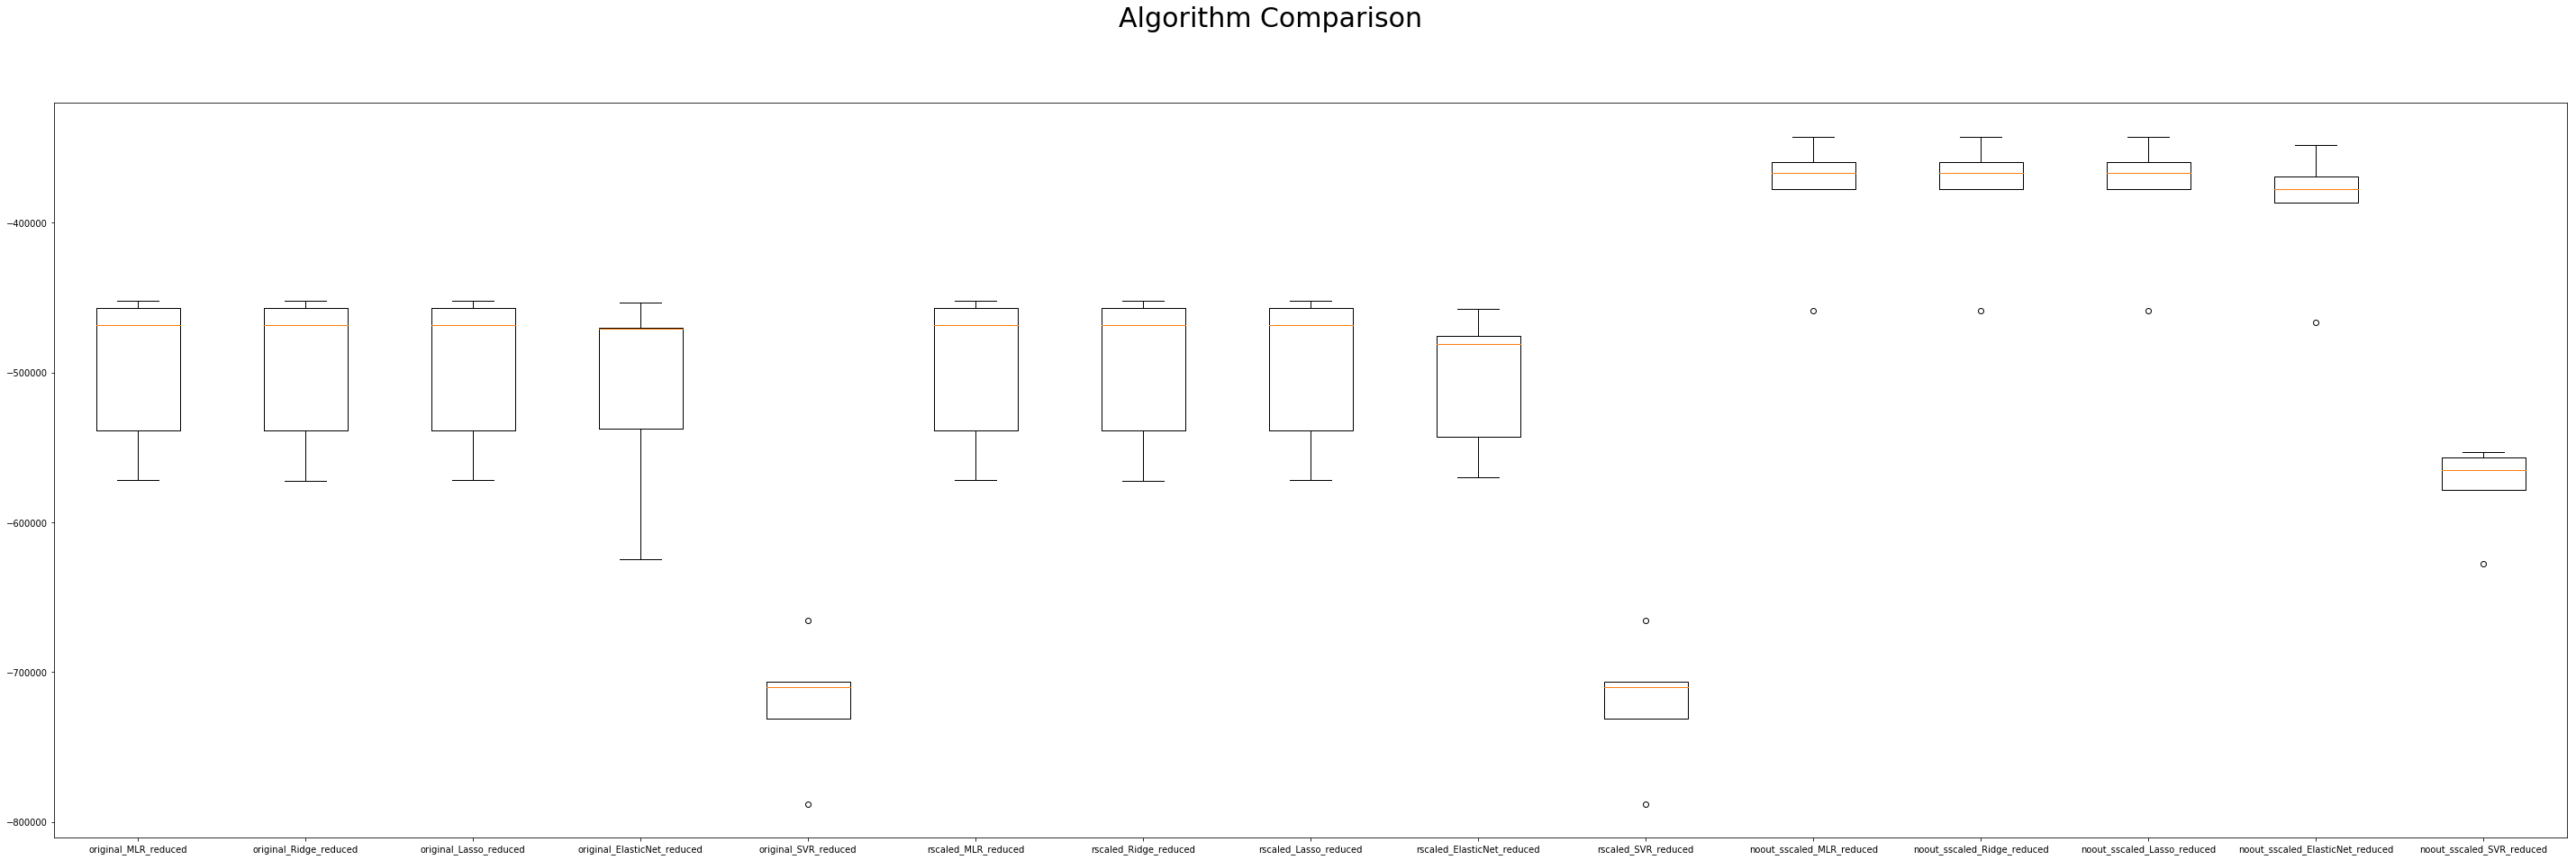

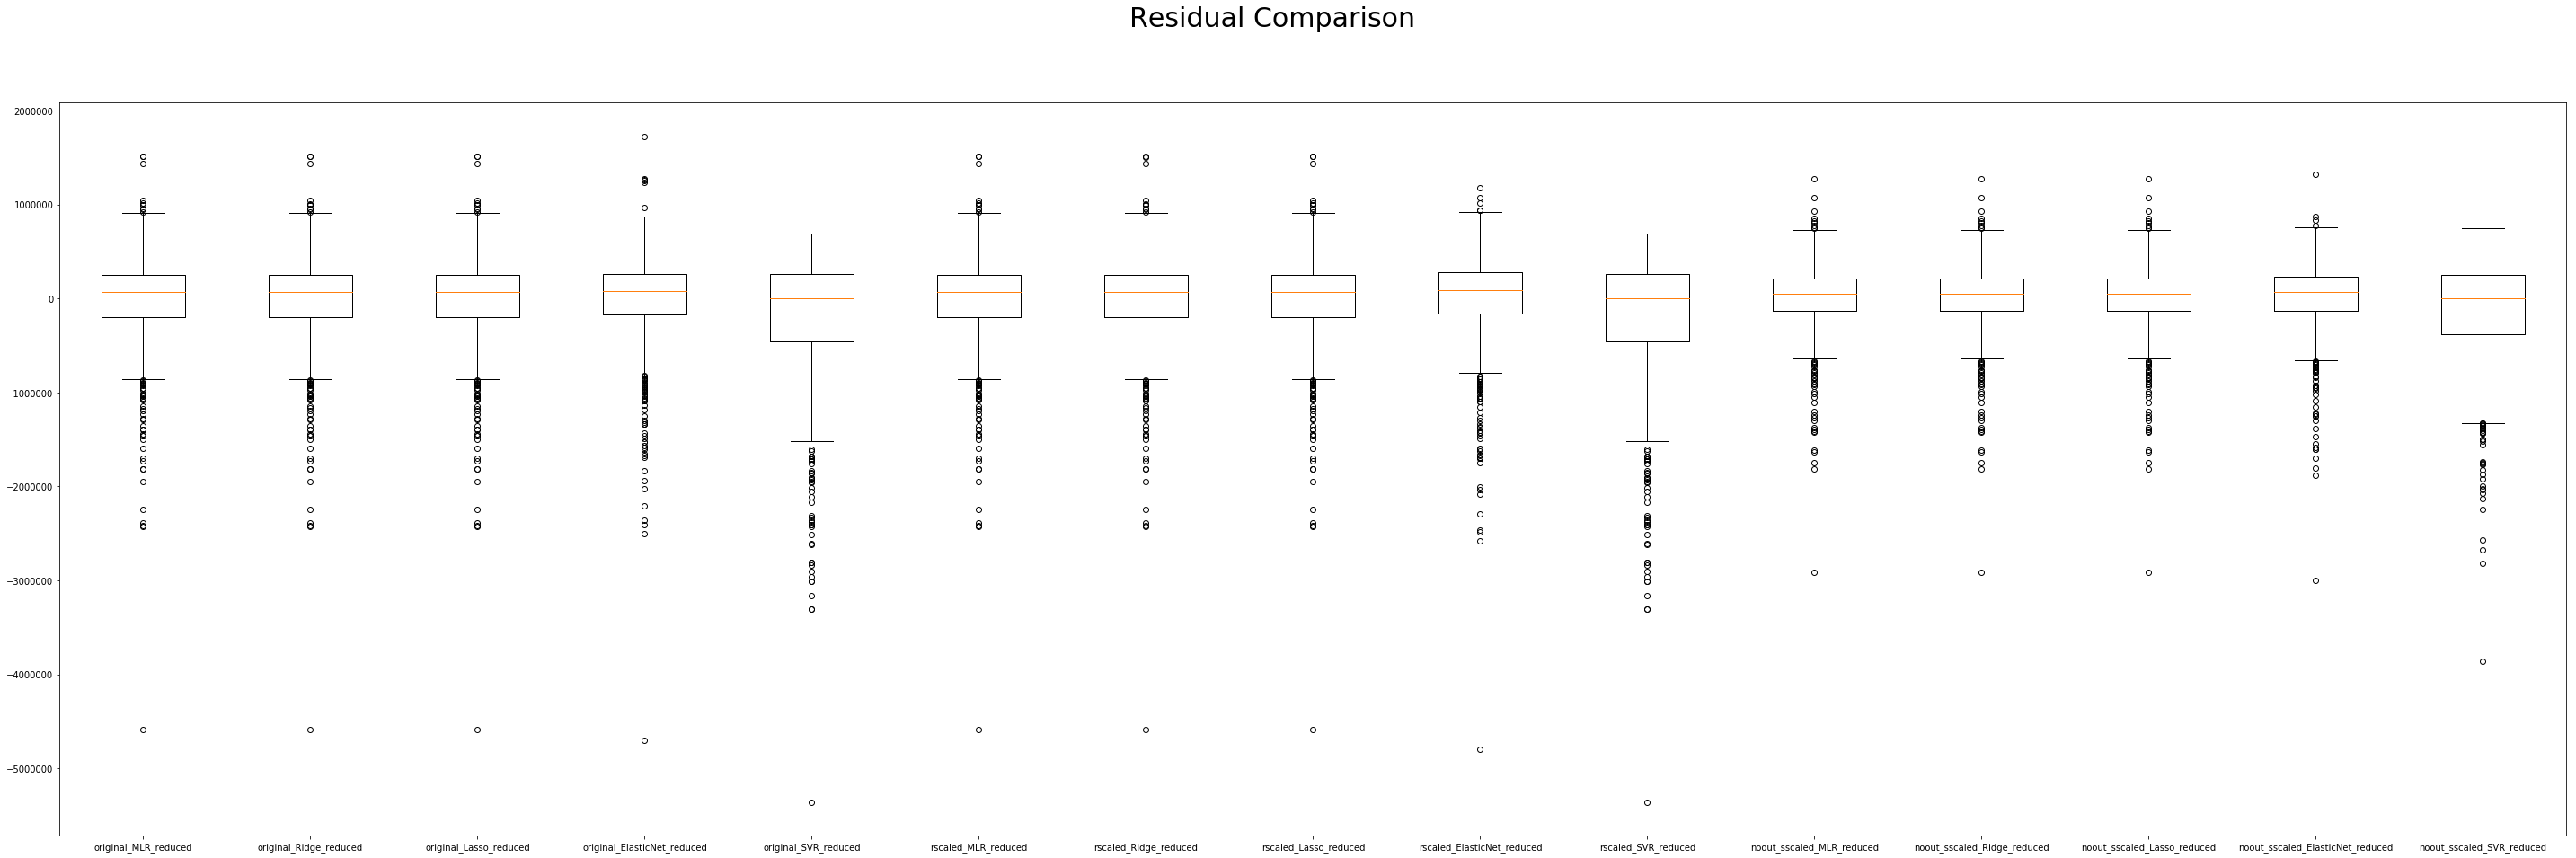

In [87]:
# prepare models
models = []

models.append(('MLR_reduced', LinearRegression()))
models.append(('Ridge_reduced', Ridge()))
models.append(('Lasso_reduced', Lasso()))
models.append(('ElasticNet_reduced', ElasticNet()))
models.append(('SVR_reduced', SVR()))

results = []
names = []
y_residuals = []
scoring = 'neg_root_mean_squared_error'

# loop through the training set
for dfname in training_set.keys():
    
        
    # ----------------
    # reduced parameter
    # -----------------
    # based on our eda above, we had preselected features that has strong correlation with the target price
        
    X_reduced = training_set[dfname][['Rooms', 'Bedroom2', 'Bathroom', 'BuildingArea', 'Car', 'YearBuilt']].values    
    y_reduced = training_set[dfname]['Price'].values
    
    # split train data     
    X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)
    
    for name, model in models:
        model.fit(X_train_reduced, y_train_reduced)
        y_pred = model.predict(X_test_reduced)
        
        eval_ = {
            'name': dfname+'_'+name,
            'MAE': metrics.mean_absolute_error(y_test_reduced, y_pred),
            '%MAPE': mean_absolute_percentage_error(y_test_reduced, y_pred),
            'RMSE': np.sqrt(metrics.mean_squared_error(y_test_reduced, y_pred)),
            '%RMSPE': (np.sqrt(np.mean(np.square((y_test_reduced - y_pred) / y_test_reduced)))) * 100,
            'r2': round(metrics.r2_score(y_test_reduced, y_pred), 2)
        }
        
        # visualize residual          
        residual_df = {
            'y_pred': y_pred,
            'y_act': y_test_reduced
        }
        residual_df = pd.DataFrame(residual_df)
        residual_df['residual'] = residual_df['y_pred'] - residual_df['y_act']
        
        y_residuals.append(residual_df['residual'].values)
        
        # -----------------
        # cross validation         
        # -----------------
        
        cv_results = model_selection.cross_val_score(model, X_reduced, y_reduced, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(dfname+'_'+name)
        
        eval_['cv_score_rmse'] = cv_results.mean()

        eval_matrix_wholedata.append(eval_)
        
        print(eval_)
        
        
        
# boxplot algorithm comparison (based on rmse)
fig = plt.figure(figsize=(50,15))
fig.suptitle('Algorithm Comparison', fontsize=30)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# boxplot algorithm comparison (based on rmse)
fig = plt.figure(figsize=(50,15))
fig.suptitle('Residual Comparison', fontsize=30)
ax = fig.add_subplot(111)
plt.boxplot(y_residuals)
ax.set_xticklabels(names)
plt.show()

In [89]:
linear_model_score = pd.DataFrame(eval_matrix_wholedata)

In [91]:
linear_model_score.sort_values('RMSE', ascending=True)

,name,MAE,%MAPE,RMSE,%RMSPE,r2,cv_score_rmse
11,noout_sscaled_Ridge,1.794350e+05,2.163047e+01,2.630309e+05,4.596412e+01,7.700000e-01,-2.949152e+05
12,noout_sscaled_Lasso,1.822195e+05,2.203584e+01,2.646968e+05,4.527941e+01,7.700000e-01,-2.991083e+05
13,noout_sscaled_ElasticNet,2.236643e+05,2.576052e+01,3.313848e+05,4.886275e+01,6.400000e-01,-3.460663e+05
6,rscaled_Ridge,2.301975e+05,2.491105e+01,3.446439e+05,3.644297e+01,7.400000e-01,-3.902149e+05
1,original_Ridge,2.302188e+05,2.491302e+01,3.446923e+05,3.645025e+01,7.400000e-01,-3.902171e+05
2,original_Lasso,2.339064e+05,2.558596e+01,3.489328e+05,3.794468e+01,7.400000e-01,-4.000474e+05
7,rscaled_Lasso,2.339080e+05,2.558605e+01,3.489334e+05,3.794409e+01,7.400000e-01,-4.000487e+05
25,noout_sscaled_MLR_reduced,2.527368e+05,2.916671e+01,3.668175e+05,5.154438e+01,5.500000e-01,-3.809961e+05
27,noout_sscaled_Lasso_reduced,2.527368e+05,2.916672e+01,3.668175e+05,5.154437e+01,5.500000e-01,-3.809961e+05
26,noout_sscaled_Ridge_reduced,2.527417e+05,2.916711e+01,3.668192e+05,5.154456e+01,5.500000e-01,-3.809956e+05


In [92]:
linear_model_score.sort_values('MAE', ascending=True)

,name,MAE,%MAPE,RMSE,%RMSPE,r2,cv_score_rmse
11,noout_sscaled_Ridge,1.794350e+05,2.163047e+01,2.630309e+05,4.596412e+01,7.700000e-01,-2.949152e+05
12,noout_sscaled_Lasso,1.822195e+05,2.203584e+01,2.646968e+05,4.527941e+01,7.700000e-01,-2.991083e+05
13,noout_sscaled_ElasticNet,2.236643e+05,2.576052e+01,3.313848e+05,4.886275e+01,6.400000e-01,-3.460663e+05
6,rscaled_Ridge,2.301975e+05,2.491105e+01,3.446439e+05,3.644297e+01,7.400000e-01,-3.902149e+05
1,original_Ridge,2.302188e+05,2.491302e+01,3.446923e+05,3.645025e+01,7.400000e-01,-3.902171e+05
2,original_Lasso,2.339064e+05,2.558596e+01,3.489328e+05,3.794468e+01,7.400000e-01,-4.000474e+05
7,rscaled_Lasso,2.339080e+05,2.558605e+01,3.489334e+05,3.794409e+01,7.400000e-01,-4.000487e+05
27,noout_sscaled_Lasso_reduced,2.527368e+05,2.916672e+01,3.668175e+05,5.154437e+01,5.500000e-01,-3.809961e+05
25,noout_sscaled_MLR_reduced,2.527368e+05,2.916671e+01,3.668175e+05,5.154438e+01,5.500000e-01,-3.809961e+05
26,noout_sscaled_Ridge_reduced,2.527417e+05,2.916711e+01,3.668192e+05,5.154456e+01,5.500000e-01,-3.809956e+05


In [93]:
linear_model_score.iloc[11]

name             noout_sscaled_Ridge
MAE                           179435
%MAPE                        21.6305
RMSE                          263031
%RMSPE                       45.9641
r2                              0.77
cv_score_rmse                -294915
Name: 11, dtype: object

Observation:

- Among all the tested model, the best was Ridge with data scaled (StandardScaler)
- However, there are too many outliers in the residuals, that indicates that the prediction model still has high variance
- This could happened because of the outlier prices in the datasets

## Tree Based Regressor

In [72]:
eval_matrix = pd.DataFrame()

In [112]:
# define random_state 42, for the answer of all question in this universe :D
rstate = 42

In [113]:
kfold = model_selection.KFold(n_splits=5, random_state=rstate, shuffle=True)

### Model Testing Automation

I wrote an automation function to test various model, with different dataset configuration.

for each dataset: 

1. it test model prediction with default parameter first, then evaluate the score using cross validation
2. using the provided hyperparameters tuning options, it tries to tune the model parameters and come out with best parameters. then this function will re-evaluate the score
3. from the hyper parameter tuning, we could also get some features that have most significance towards the class target, then this function will try to refit the train data with reduced variables

In [123]:
def automate_model_testing(model, training_set, model_name, param_grid, scoring = 'neg_root_mean_squared_error', figsize = (30,10), n_feature = 10):

    model_eval_matrix = []
    model_cv_results = []
    model_cv_names = []
    
    y_predictions = []
    y_prednames = []

    for train_df_name in training_set.keys():

        
        df = training_set[train_df_name]
        X_train, X_test, y_train, y_test = train_test_split(df.drop(['Address', 'Longtitude', 'Lattitude', 'Price', 'Postcode', 'Date'], axis=1), df[target_cols], test_size = 0.2, random_state = rstate)

        # -----------------------------------------------
        # try default model parameter
        # -----------------------------------------------

        model_default = model()
        model_default.fit(X_train, y_train)
        y_pred_model_default = model_default.predict(X_test)

        # evaluate cross validation
        cv_results = model_selection.cross_val_score(model_default, df.drop(['Address', 'Longtitude', 'Lattitude', 'Price', 'Postcode', 'Date'], axis=1), df[target_cols], cv=kfold, scoring=scoring)
        model_cv_results.append(cv_results)
        model_cv_names.append('{}_default'.format(train_df_name))

        # append to eval_matrix
        model_default_metric = {
            'name': '{}_{}_default'.format(train_df_name, model_name),
            'MAE': metrics.mean_absolute_error(y_test, y_pred_model_default),
            '%MAPE': mean_absolute_percentage_error(y_test, y_pred_model_default),
            'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_model_default)),
            '%RMSPE': (np.sqrt(np.mean(np.square((y_test - y_pred_model_default) / y_test)))) * 100,
            'r2': round(metrics.r2_score(y_test, y_pred_model_default), 2)
        }

        model_eval_matrix.append(model_default_metric)
        
        # --------------------------
        # try hyperparameter tuning
        # --------------------------
        model_RS = RandomizedSearchCV(
            estimator = model(), param_distributions= param_grid, cv = kfold, error_score = 0
        )

        model_RS.fit(X_train, y_train)
        best_params_rs = model_RS.best_params_

        print(f'{train_df_name}_{model_name} best parameters after tuning', best_params_rs)

        model_hyperparameter = model(**best_params_rs)
        model_hyperparameter.fit(X_train, y_train)
        y_pred_model_hyperparam = model_hyperparameter.predict(X_test)

        # evaluate cross validation
        cv_results_hyperparam = model_selection.cross_val_score(model_hyperparameter, df.drop(['Address', 'Longtitude', 'Lattitude', 'Price', 'Postcode', 'Date'], axis=1), df[target_cols], cv=kfold, scoring=scoring)
        model_cv_results.append(cv_results_hyperparam)
        model_cv_names.append('{}_hyperparam'.format(train_df_name))

        # append to eval_matrix
        model_hyperparam_metric = {
            'name': '{}_{}_hyperparam'.format(train_df_name, model_name),
            'MAE': metrics.mean_absolute_error(y_test, y_pred_model_hyperparam),
            '%MAPE': mean_absolute_percentage_error(y_test, y_pred_model_hyperparam),
            'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_model_hyperparam)),
            '%RMSPE': (np.sqrt(np.mean(np.square((y_test - y_pred_model_hyperparam) / y_test)))) * 100,
            'r2': round(metrics.r2_score(y_test, y_pred_model_hyperparam), 2)
        }

        model_eval_matrix.append(model_hyperparam_metric)
        
        # ----------------------------
        # Evaluate feature importance
        # ----------------------------

        importance = model_hyperparameter.feature_importances_
        feature_importance = pd.Series(data = list(map(lambda x: abs(x), importance)), index= X_train.columns)

        # visualize feature importance
        plt.figure(figsize=figsize)
        plt.title('Feature Importance {} {}'.format(train_df_name, model_name))
        feature_importance.nlargest(n_feature).plot(kind='barh')
        plt.show()

        # Retrain model using reduced feature
        reduced_feature = feature_importance.nlargest(n_feature).index
        X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(df[reduced_feature], df[target_cols], test_size = 0.2, random_state = rstate)

        model_reduced = model(**best_params_rs)
        model_reduced.fit(X_train_reduced, y_train_reduced)
        y_pred_model_reduced = model_reduced.predict(X_test_reduced)

        # evaluate cross validation
        cv_results_reduced = model_selection.cross_val_score(model_reduced, df[reduced_feature], df[target_cols], cv=kfold, scoring=scoring)
        model_cv_results.append(cv_results_reduced)
        model_cv_names.append('{}_reduced'.format(train_df_name))

        # append to eval_matrix
        model_reduced_metric = {
            'name': '{}_{}_reduced'.format(train_df_name, model_name),
            'MAE': metrics.mean_absolute_error(y_test, y_pred_model_reduced),
            '%MAPE': mean_absolute_percentage_error(y_test, y_pred_model_reduced),
            'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_model_reduced)),
            '%RMSPE': (np.sqrt(np.mean(np.square((y_test - y_pred_model_reduced) / y_test)))) * 100,
            'r2': round(metrics.r2_score(y_test, y_pred_model_reduced), 2)
        }

        model_eval_matrix.append(model_reduced_metric) 
        

    # boxplot algorithm comparison
    fig = plt.figure(figsize=figsize)
    fig.suptitle('{} Algorithm Comparison'.format(model_name), fontsize=30)
    ax = fig.add_subplot(111)
    plt.boxplot(model_cv_results)
    ax.set_xticklabels(model_cv_names)
    plt.show()
    
    
    return pd.DataFrame(model_eval_matrix)



### Random Forest Regressor

In [155]:
rf_param_grid = {
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt','log2', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 7],
    'n_estimators': [200, 400, 600]
}

In [165]:
rf_test = automate_model_testing(
    RandomForestRegressor, 
    training_set = {
        'original': df_base
    }, 
    model_name = 'rf', 
    param_grid= rf_param_grid,
    scoring = 'neg_root_mean_squared_error',
    figsize = (30,10),
    n_feature = 10)

KeyboardInterrupt: 

### Decision Tree Regressor

In [145]:
dt_param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt','log2', None],
    'min_samples_leaf': [1, 2, 4, 6, 8, 12],
    'min_samples_split': [2, 5, 7, 10, 14]
}

original_dt best parameters after tuning {'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 'auto', 'max_depth': None}


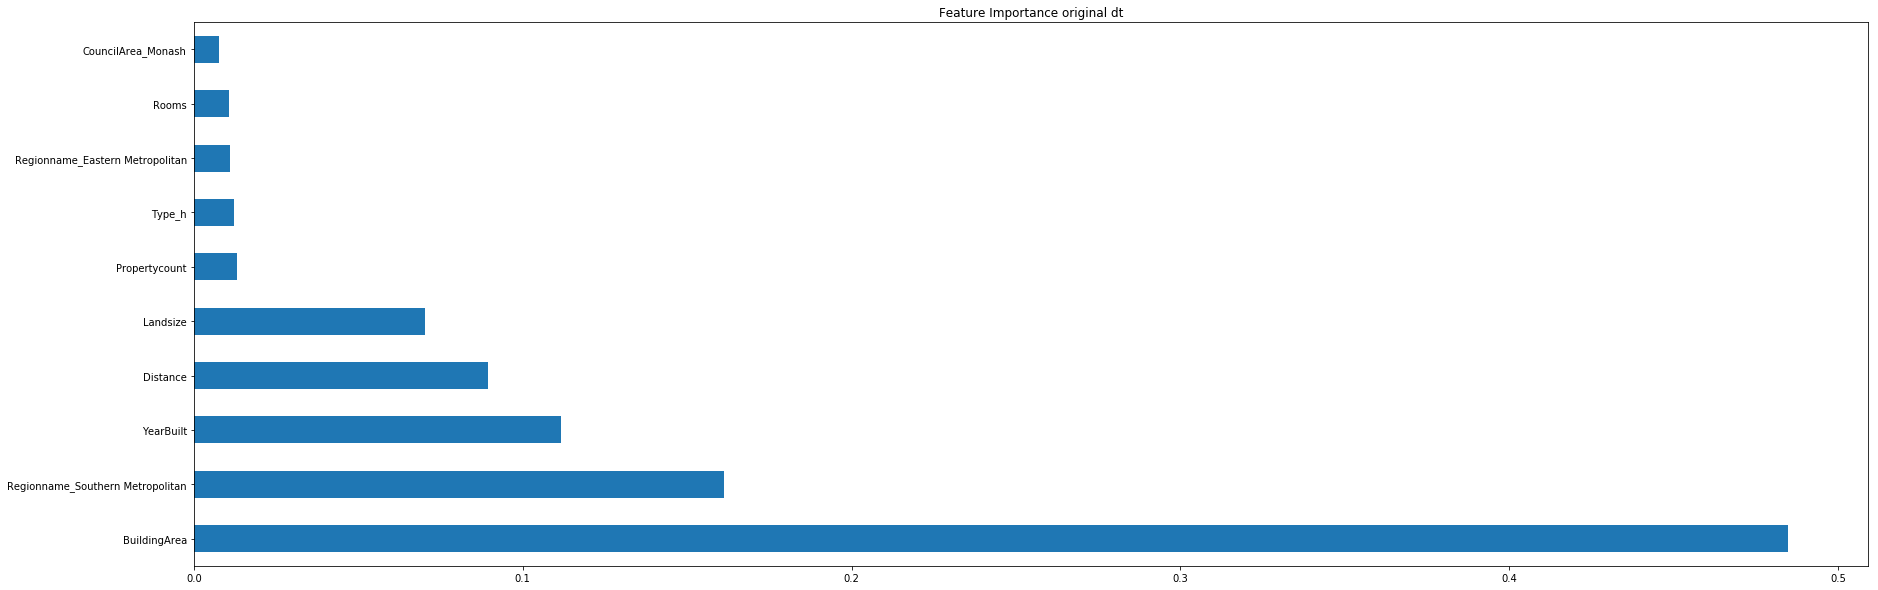

rscaled_dt best parameters after tuning {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 50}


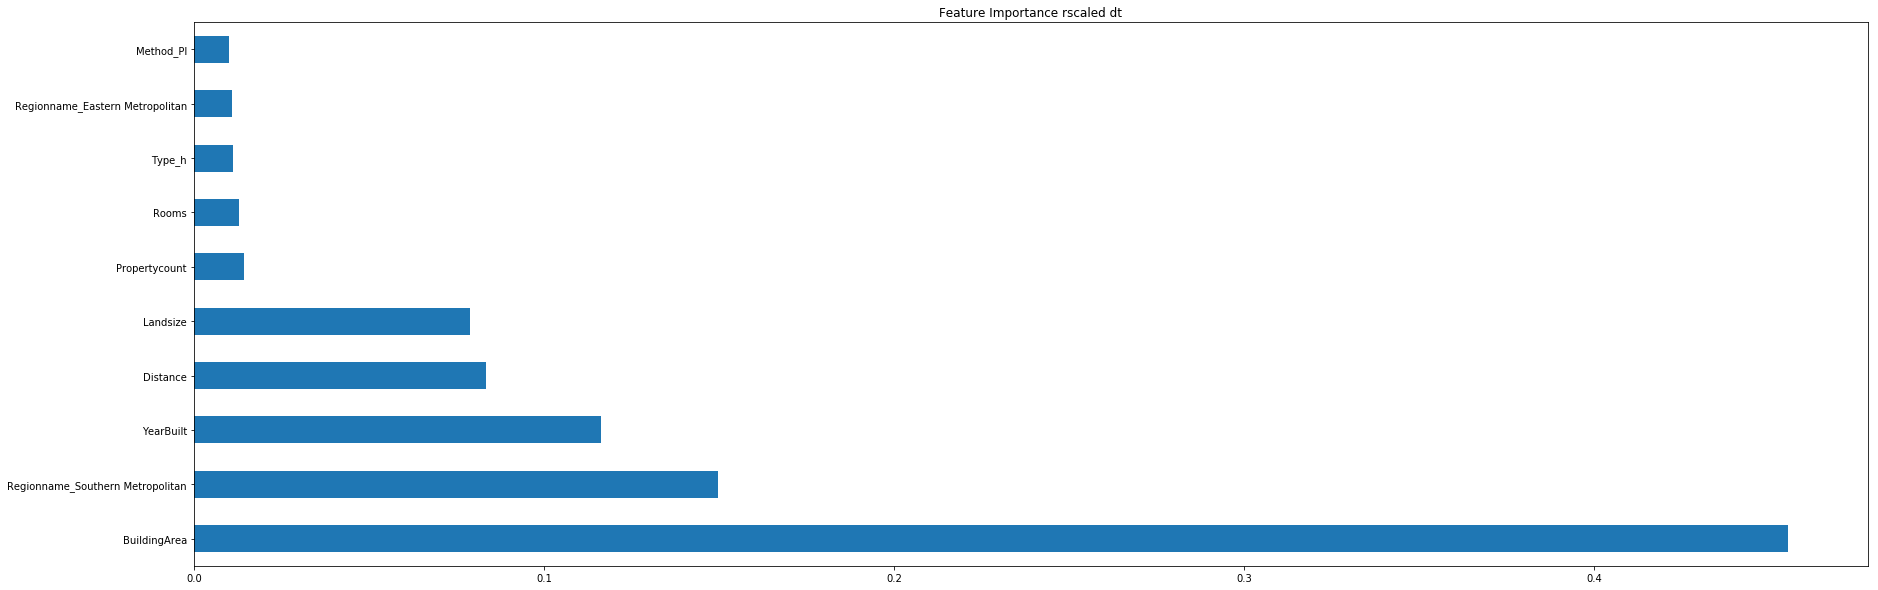

noout_sscaled_dt best parameters after tuning {'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}


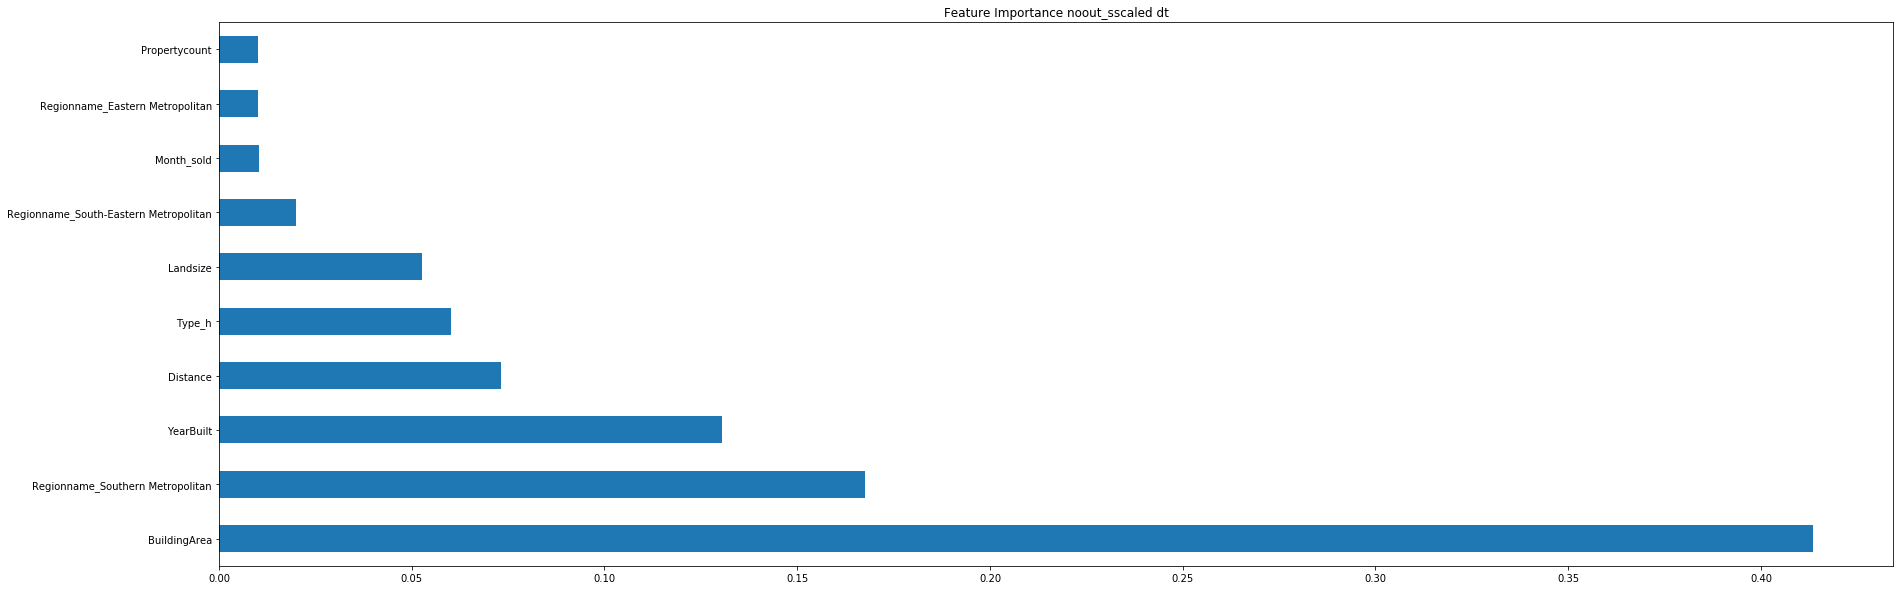

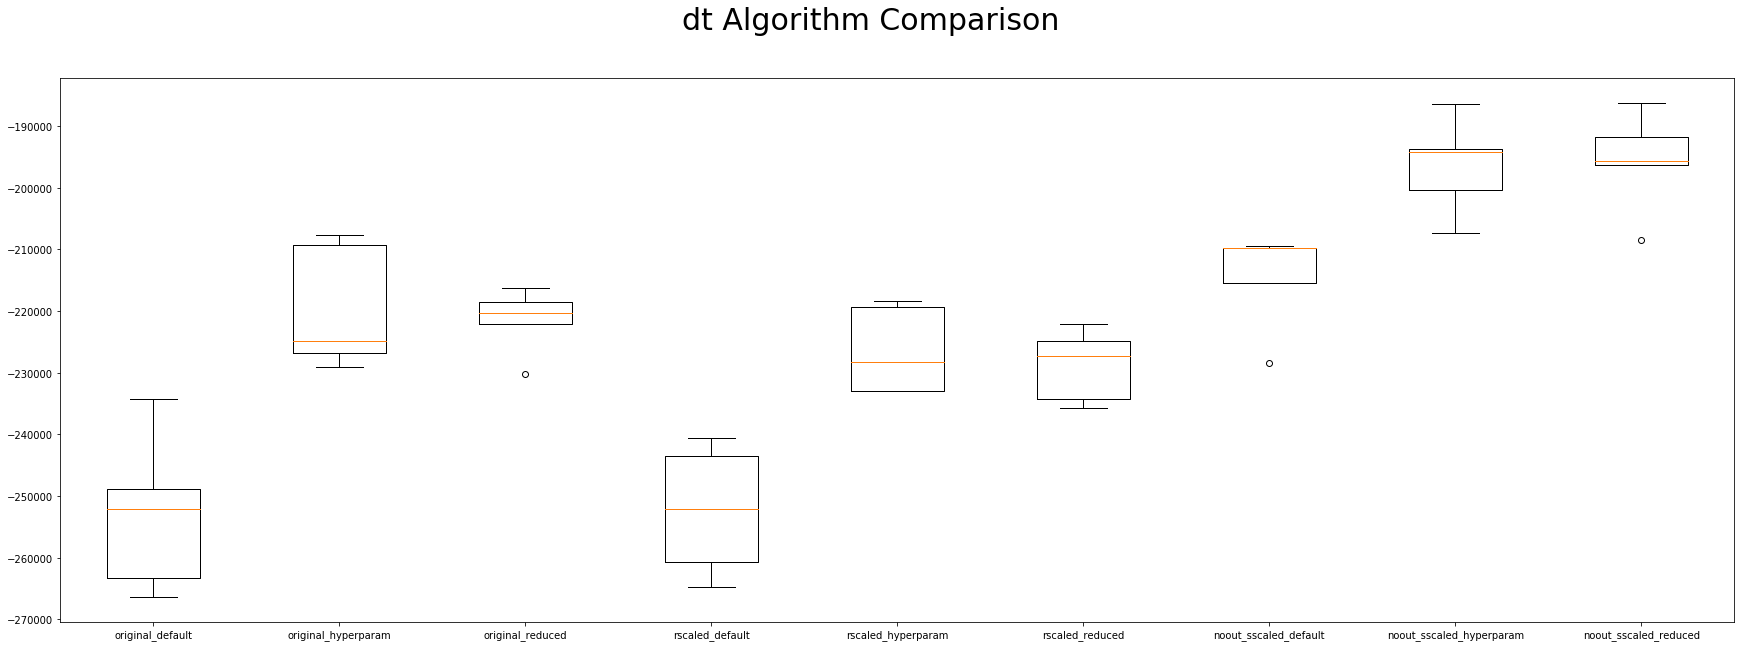

In [150]:
dt_test = automate_model_testing(
    DecisionTreeRegressor, 
    training_set = training_set, 
    model_name='dt', 
    param_grid= dt_param_grid,
    scoring = 'neg_mean_absolute_error',
    figsize = (30,10),
    n_feature = 10)

In [151]:
dt_test.sort_values('RMSE', ascending=True)

,name,MAE,%MAPE,RMSE,%RMSPE,r2
8,noout_sscaled_dt_reduced,191815.682847,20.178329,315985.810776,61.219380,0.67
7,noout_sscaled_dt_hyperparam,194201.767051,20.666815,316025.924382,61.577527,0.67
1,original_dt_hyperparam,207605.830822,19.265082,324442.779838,26.851806,0.77
6,noout_sscaled_dt_default,212276.565534,21.852160,340922.414048,55.633966,0.61
4,rscaled_dt_hyperparam,219445.174902,19.807161,344104.682646,26.955252,0.74
2,original_dt_reduced,218597.774632,20.194144,347327.709485,28.282048,0.74
5,rscaled_dt_reduced,222079.293878,20.371587,354190.779433,29.550787,0.73
0,original_dt_default,243384.488000,22.484765,392952.082879,32.604889,0.66
3,rscaled_dt_default,245024.224000,22.681973,395719.123795,33.002043,0.66


In [153]:
dt_test.sort_values('MAE', ascending=True)

,name,MAE,%MAPE,RMSE,%RMSPE,r2
8,noout_sscaled_dt_reduced,191815.682847,20.178329,315985.810776,61.219380,0.67
7,noout_sscaled_dt_hyperparam,194201.767051,20.666815,316025.924382,61.577527,0.67
1,original_dt_hyperparam,207605.830822,19.265082,324442.779838,26.851806,0.77
6,noout_sscaled_dt_default,212276.565534,21.852160,340922.414048,55.633966,0.61
2,original_dt_reduced,218597.774632,20.194144,347327.709485,28.282048,0.74
4,rscaled_dt_hyperparam,219445.174902,19.807161,344104.682646,26.955252,0.74
5,rscaled_dt_reduced,222079.293878,20.371587,354190.779433,29.550787,0.73
0,original_dt_default,243384.488000,22.484765,392952.082879,32.604889,0.66
3,rscaled_dt_default,245024.224000,22.681973,395719.123795,33.002043,0.66


In [154]:
dt_test.iloc[8]

name      noout_sscaled_dt_reduced
MAE                         191816
%MAPE                      20.1783
RMSE                        315986
%RMSPE                     61.2194
r2                            0.67
Name: 8, dtype: object

The best that I could achieve with Decision Tree Regressor still has high variance.

### Final Model

From Linear Model, I am still not satisfied with the performance, but if i have to choose it would Ridge with data scaled (StandardScaler)

However I am still waiting for the Tree-based regressor result, as when this assignment is submitted, it still running

It is important for the real-estate company (or city planner, developers, etc) to have more accurate prediction (with less bias and less variance), to predict and decide when and where to sell/purchase/build any property strategically.

**Suggestion**:

- Include more samples
- Reprocess data to detect more anomalies
- Investigate more on outlier prices (with domain knowledge)

### ***Reference functions***

In [9]:
from scipy.stats import shapiro
# check type of distribution in each attributes
def quick_check_n_dist(df, columns=None, ci=.05):
    result = {}
    if columns is None:
        columns = list(df.describe().columns) # check only numerical columns    
    for col in columns:
        result[col] = [shapiro(df[col])[1]]
    df = pd.DataFrame(result).T
    df.rename(columns={0:'p-val'}, inplace=True)
    df['normal dist'] = df.apply(lambda x: 'y' if x['p-val'] > ci else 'n', axis=1)
    return df
# norm_table = quick_check_n_dist(adm_df, columns=attr_cols)
# norm_table

In [10]:
def get_outlier_idx_iqr(x):
    # x is a series
    iqr = x.quantile(.75) - x.quantile(.25)
    low = x.quantile(.25) - (1.5*iqr)
    high = x.quantile(.75) + (1.5*iqr)
    return x[(x < low) | (x > high)].index

def get_outlier_idx_stdev(x):
    std = x.std()
    mean_ = x.mean()
    return x[(x < (mean_-3*std)) | (x > (mean_+3*std))].index

def get_outlier_idx_compound(d, columns=None):
    outlier_idx = set()
    
    if columns is None:
        columns = list(df.describe().columns)
        
    norm_table = quick_check_n_dist(d, columns)
    
    for c in columns:
        if norm_table.loc[c]['normal dist'] == 'y':
            #filter non-outlier based on stdev
            outlier_idx.update(list(get_outlier_idx_stdev(d[c])))
        else:
            #filter non-outlier based on iqr
            outlier_idx.update(list(get_outlier_idx_iqr(d[c])))
    
    return pd.Index(outlier_idx)

In [11]:
def describe_columns(df, columns=None):
    '''
    Describe columns in the dataframe including:
    - Missing Data Count
    - Outlier Data
    - Unique Sample
    '''
    if columns is None:
        columns = list(df.columns)
        
    numerical_columns = list(df.describe().columns)
        
    column_descs = []
    
    for col in columns:
        
        outlier_count = len(get_outlier_idx_compound(df, columns=[col])) if col in numerical_columns else np.nan
        
        col_desc = {
            'col_name': col,
            'dtype': df[col].dtypes,
            'null_count': df[col].isna().sum(),
            'null_%': (df[col].isna().sum() / len(df[col])) * 100,
            'is_normal_dist': (quick_check_n_dist(df, columns=[col]).loc[col]['normal dist'] if col in numerical_columns else 'cat'),
            'outlier_count': outlier_count,
            'outlier_%': (outlier_count / len(df[col])) * 100 if pd.notna(outlier_count) else np.nan,
            'n_unique': df[col].nunique(),
            'unique_sample': df[col].drop_duplicates().sample(2).values
        }
        
        column_descs.append(col_desc)
    
        
    return pd.DataFrame(column_descs)

In [12]:
def create_outlier_reference_df(df, columns=None, separate=True):
    '''
    If outlier row was decided to be marked,
    then this function is for create the mark of outlier as reference
    it is useful when we want to exclude outlier in training set
    '''
    
    if columns is None:
        columns = list(df.describe().columns)
        
    outref = dict()
    
    # create mark for individual column
    for col in columns:
        o_index_col = get_outlier_idx_compound(df, columns=[col])
        outref['outlier_{}'.format(col)] = df.apply(lambda x: 1 if x.name in o_index_col else 0, axis=1)
        
    # create a compound index if columns provided are more than one
    if len(columns)>1:
        o_index_comp = get_outlier_idx_compound(df, columns=columns)
        outref['outlier_compound'] = df.apply(lambda x: 1 if x.name in o_index_comp else 0, axis=1)
        
    outref = pd.DataFrame(outref)
    
    if separate:
        return outref
    else:
        return pd.concat([df, outref], axis=1)
    

In [13]:
from sklearn.utils import class_weight

# get class weight based on class count distribution
def get_class_weight(y):
    class_weights = class_weight.compute_class_weight('balanced',np.unique(y),y)
    return class_weights

In [14]:
def get_dummies(df, columns=[]):
    '''
    encode categorical columns with one-hot-encoding, this is for nominal data
    '''
    for col in columns:
        df = pd.get_dummies(df, prefix=[col], columns=[col])
    
    return df

In [15]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    '''
    encode categorical columns by naming labels on each unique value based on appearance
    best for ordinal data
    '''
    for col in columns:
        df['{}_encoded'.format(col)] = LabelEncoder().fit_transform(df[col])
    return df

# label_encode(df_test,['who','sex'])